In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import pymannkendall as pmk 
import matplotlib.pyplot as plt


In [2]:
in_file = "_grib2netcdf-webmars-public-svc-green-005-6fe5cac1a363ec1525f54343b6cc9fd8-XM_YF6.nc"

In [3]:
Data = xr.open_dataset(in_file)
#Data

In [5]:
pressure_data = Data['sp']
pressure_data

<xarray.DataArray 'sp' (time: 12, latitude: 67, longitude: 65)>
array([[[101502.03 , 101537.67 , ..., 101368.47 , 101552.76 ],
        [101548.266, 101569.78 , ..., 100829.06 , 101255.125],
        ...,
        [101251.27 , 101250.63 , ...,  89583.234,  90409.99 ],
        [101267.01 , 101270.54 , ...,  89299.73 ,  89493.01 ]],

       [[100355.484, 100394.016, ..., 100803.38 , 101001.805],
        [100436.4  , 100461.766, ..., 100303.8  , 100751.37 ],
        ...,
        [101173.26 , 101171.33 , ...,  89516.77 ,  90341.28 ],
        [101189.95 , 101192.84 , ...,  89233.91 ,  89427.836]],

       ...,

       [[101789.07 , 101796.45 , ..., 101312.6  , 101521.62 ],
        [101783.61 , 101776.87 , ..., 100837.09 , 101291.41 ],
        ...,
        [101207.93 , 101211.14 , ...,  89446.13 ,  90264.55 ],
        [101231.37 , 101240.04 , ...,  89158.13 ,  89347.89 ]],

       [[100618.445, 100642.84 , ..., 101253.84 , 101439.1  ],
        [100612.984, 100630.97 , ..., 100742.375, 101174.86 ],
        ...,
        [101114.5  , 101115.14 , ...,  89425.586,  90252.984],
        [101136.98 , 101143.4  , ...,  89146.58 ,  89341.14 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -23.0 -22.25 -21.5 -20.75 ... 23.5 24.25 25.0
  * latitude   (latitude) float32 39.5 38.75 38.0 37.25 ... -8.5 -9.25 -10.0
  * time       (time) datetime64[ns] 2010-01-01T15:00:00 ... 2010-12-01T15:00:00
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

In [11]:
#Single Line Selection 
SLS = pressure_data.sel(lon=40, lat=50 ,method='nearest')

ValueError: dimensions or multi-index levels ['lon', 'lat'] do not exist

In [9]:
SLS.plot()
plt.show()

NameError: name 'SLS' is not defined

(array([  56.,  239.,  982., 3679., 4245., 2373., 1368.,  638.,  285.,
          55.]),
 array([20.300001, 21.86    , 23.420002, 24.980001, 26.54    , 28.100002,
        29.660002, 31.220001, 32.780003, 34.34    , 35.9     ],
       dtype=float32),
 <BarContainer object of 10 artists>)

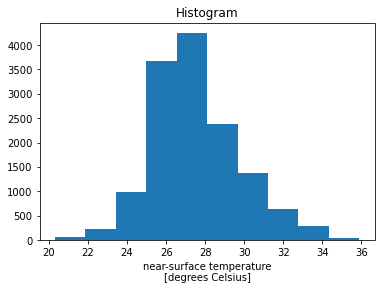

In [36]:
# Areal Selection & Averaging 
ASA = Tem_data.sel(lon=np.arange(-1.5,1.5,0.5) , lat=np.arange(5,15,0.5), method="nearest")
ASA.plot()

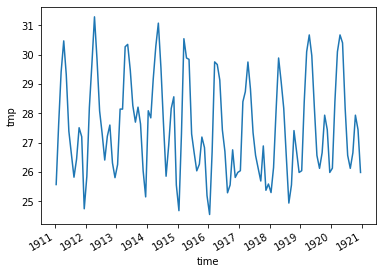

In [37]:
ASA = ASA.mean(dim=('lon','lat'))
ASA.plot()

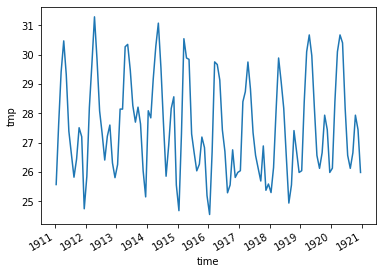

In [38]:
Average = ASA.groupby('time.year').mean('time')
ASA.plot()

In [42]:
# Statistics of Data
start_result = pmk.original_test(Average)
print(start_result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.8580276569875211, z=-0.17888543819998318, Tau=-0.06666666666666667, s=-3.0, var_s=125.0, slope=-0.012468610491071428, intercept=27.630820546831405)


In [43]:
# Seasonal Climatology
sea_avg = ASA.groupby('time.season').mean('time')
print(sea_avg)

<xarray.DataArray 'tmp' (season: 4)>
array([26.39267 , 27.035204, 29.811407, 26.933647], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
